In [3]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline


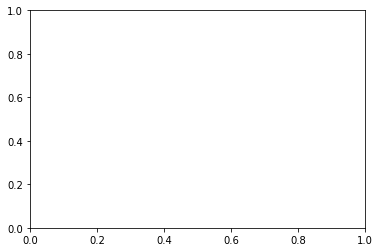

In [4]:
from transit.TLC import TLC
from transit.TM import TM
from transit.Planet import Planet
from transit.Star import Star
from transit.Instrument import Instrument

In [5]:
p = Planet()
s = Star()
i = Instrument()

In [11]:
bjd = np.linspace(p.t0.value - p.duration*1, p.t0.value + p.duration*1, 300)
fluxerr = 0.001*np.ones_like(bjd)
tlc = TLC(bjd, np.ones_like(bjd), fluxerr, directory='example/', telescope='Galileo', epoch=0)
other = TLC( directory='example/', telescope='Galileo', epoch=0)

          [tlc] initialized <TLC|Galileo,E=0|Galileo|N=300 good data> directly from .arrays
          [tlc]  saved bjd
          [tlc]  saved flux
          [tlc]  saved uncertainty
          [tlc]  saved bad
          [tlc]  saved cotrending
          [tlc]       cotrending, including:
          [tlc]  saved beta
          [tlc]  saved rescaling
          [tlc]  saved left
          [tlc]  saved right
          [tlc]  saved telescope
          [tlc]  saved epoch
          [tlc]  saved name
          [tlc] saving light curve to example/, including all its external variables
          [tlc] trying to load TLC from example/TLC.npy
          [tlc]  loaded bjd
          [tlc]  loaded flux
          [tlc]  loaded uncertainty
          [tlc]  loaded bad
          [tlc]  loaded cotrending
          [tlc]  loaded beta
          [tlc]  loaded rescaling
          [tlc]  loaded left
          [tlc]  loaded right
          [tlc]  loaded telescope
          [tlc]  loaded epoch
          [tlc]  load

In [7]:
tm = TM(planet=p, star=s, instrument=i, directory='example/')
tlc.linkModel(tm)

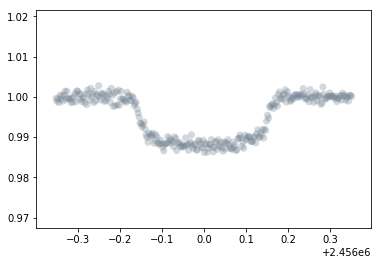

In [8]:
m = tm.planet_model(t=bjd)
tlc.flux = m+np.random.normal(0, 1, len(bjd))*fluxerr
tlc.plot(alpha=0.3)

In [9]:
tm.planet.rp_over_rs.float(0.1, [0.05, 0.15])
tm.instrument.C.float(1, [0.99,1.01])
tm.fastfit()
tlc.LightcurvePlots()
#tm.plot()


           [lm] performing a fast LM fit
           [lm] attempting to load from .example/lm/
           [lm]     k
           [lm]     C
           [tm] using atmosphere model as prior on LD coefficients
           [lm] running mpfit minimization


NameError: global name 'mpfit' is not defined

In [ ]:
tlc.ready

In [ ]:
tlc.colors['points']

In [ ]:
tlc.color